In [69]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from IPython.utils import io
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib.image import imread
from sklearn import metrics
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

files_list = []
with io.capture_output() as captured:
    for dirname, _, filenames in os.walk('C:/Users/b74/Desktop/DABL_Scripts/ML/Fruits'):
        for filename in filenames:
            files_list.append(os.path.join(dirname, filename).replace("\\","/"))
files_list = np.array(files_list)
p = np.random.permutation(len(files_list))
files_list = (files_list[p])[0:15000]

# Fruit Recognition
https://www.kaggle.com/datasets/chrisfilo/fruit-recognition

In [70]:
fruits_images = []
fruits_names = []
for file in files_list:
    image = (Image.open(file)).resize((299,299))
    fruits_images.append( np.array(image) )
    fruits_names.append( file.split("/")[-2] )
fruits_images = np.array(fruits_images)

In [71]:
fruits_names_ = []
for fruit in fruits_names:
    if fruit in ['Apple A', 'Apple B', 'Apple C', 'Apple D', 'Apple E', 'Apple F', 'Total Number of Apples']:
        fruits_names_.append( 'Apple' )
    elif fruit in ['kiwi A', 'Kiwi B', 'Kiwi C', 'Total Number of Kiwi fruit']:
        fruits_names_.append( 'Kiwi' )
    elif fruit in ['guava A', 'guava B', 'guava total final', 'Guava total']:
        fruits_names_.append( 'Guava' )
    else:
        fruits_names_.append( fruit )

fruits_classes = [*set(fruits_names_)]

In [72]:
fruits_classes

['Persimmon',
 'Tomatoes',
 'Guava',
 'Peach',
 'Banana',
 'Pear',
 'Plum',
 'muskmelon',
 'Mango',
 'Kiwi',
 'Pitaya',
 'Pomegranate',
 'Carambola',
 'Orange',
 'Apple']

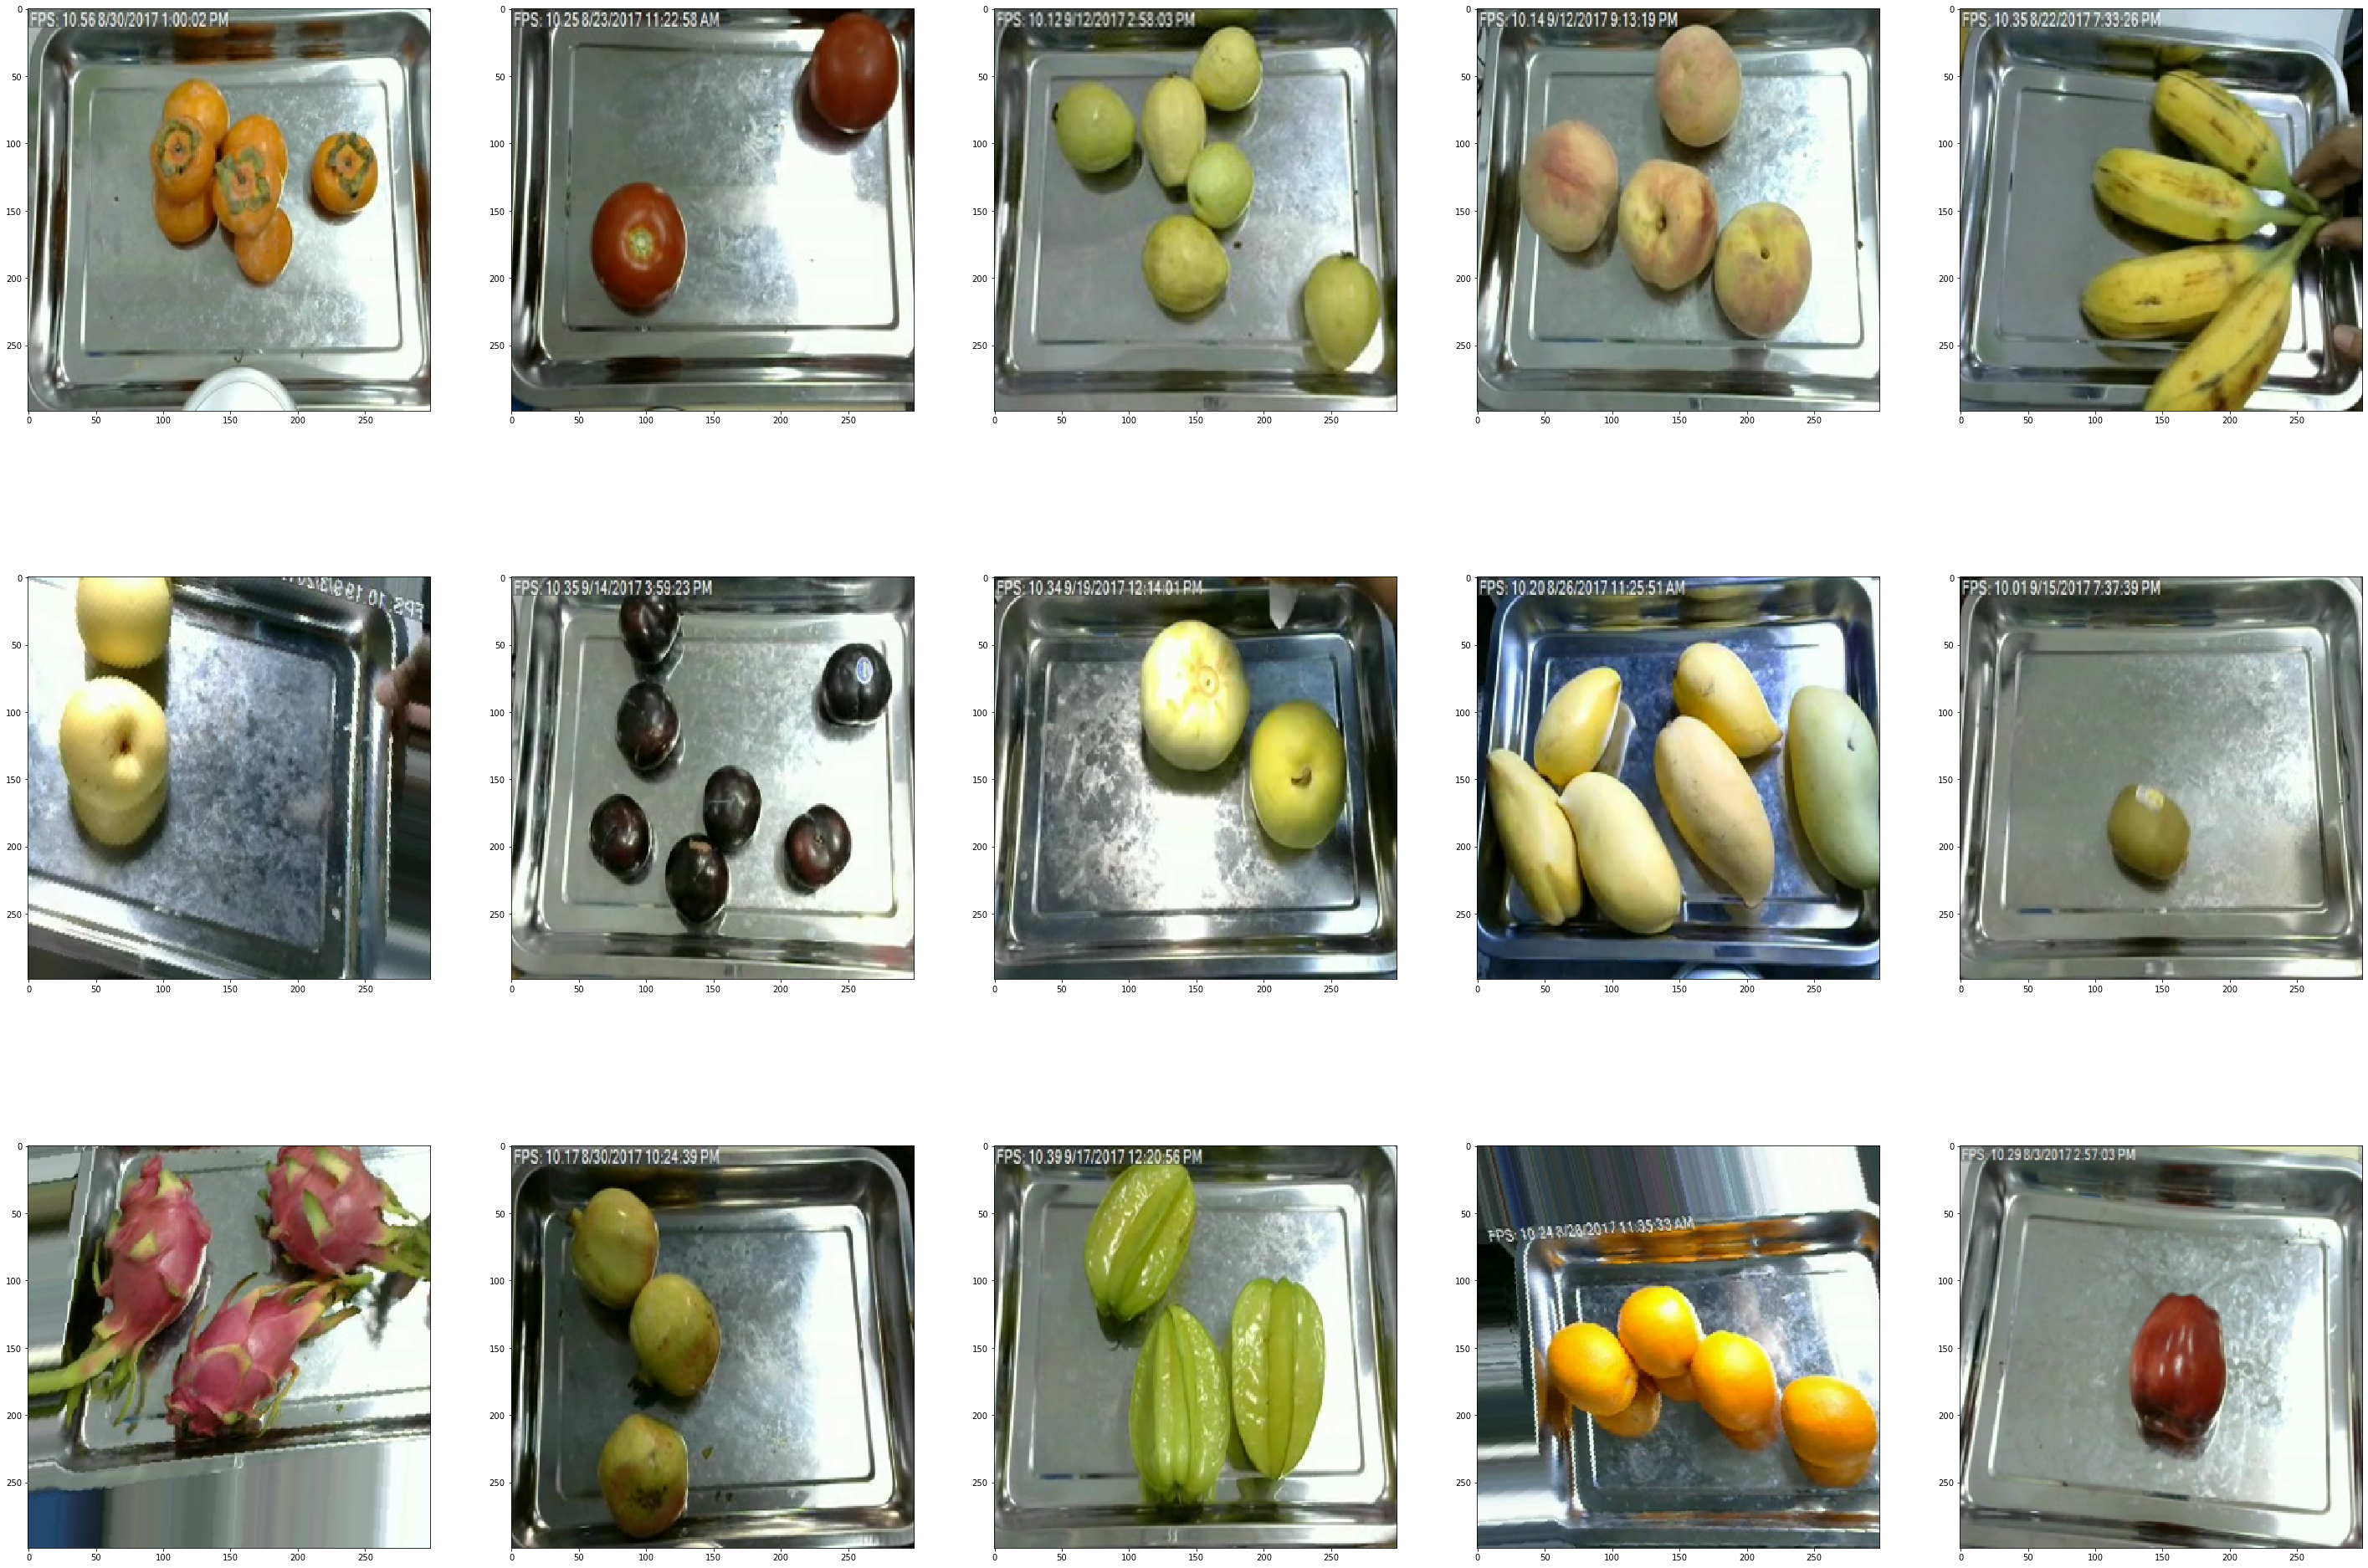

In [112]:
fig = plt.figure(figsize=(50, 50))
for i in range(len(fruits_classes)):
    sub = fig.add_subplot(3, 5, i + 1)
    sub.imshow(fruits_images[fruits_names_.index(fruits_classes[i])], interpolation='nearest')
fig.subplots_adjust(hspace=-0.5)

In [73]:
fruits_hot = []
for fruit in fruits_names_:
    vec = np.zeros(len(fruits_classes))
    vec[fruits_classes.index(fruit)] = 1
    fruits_hot.append(vec)
fruits_hot = np.array(fruits_hot)

In [74]:
p = np.random.permutation(len(fruits_names_))
X, Y = fruits_images[p], fruits_hot[p]

In [81]:
Ntt = int(0.1*len(fruits_names_))
Xtrain, Ytrain = X[0:Ntt*8], Y[0:Ntt*8]
Xvalidation, Yvalidation = X[8*Ntt:9*Ntt], Y[8*Ntt:9*Ntt]
Xtest, Ytest = X[9*Ntt:], Y[9*Ntt:]

In [94]:
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(fruits_classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)    
    
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(Xtrain, Ytrain, 
        batch_size=64,
        epochs=10,
        verbose=1,
        callbacks=[stopping_callback],
        validation_data=(Xvalidation, Yvalidation))

score = model.evaluate(Xtest, Ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
188/188 [==============================] - 733s 4s/step - loss: 12.9797 - accuracy: 0.4137 - val_loss: 1.9816 - val_accuracy: 0.4453
Epoch 2/10
188/188 [==============================] - 692s 4s/step - loss: 1.6732 - accuracy: 0.5676 - val_loss: 1.8258 - val_accuracy: 0.5073
Epoch 3/10
188/188 [==============================] - 684s 4s/step - loss: 1.2963 - accuracy: 0.6268 - val_loss: 1.0417 - val_accuracy: 0.6787
Epoch 4/10
188/188 [==============================] - 685s 4s/step - loss: 1.1092 - accuracy: 0.6686 - val_loss: 1.0608 - val_accuracy: 0.6700
Epoch 5/10
188/188 [==============================] - 682s 4s/step - loss: 1.0184 - accuracy: 0.6869 - val_loss: 1.0606 - val_accuracy: 0.6740
Epoch 6/10
188/188 [==============================] - 683s 4s/step - loss: 0.9390 - accuracy: 0.7060 - val_loss: 0.8798 - val_accuracy: 0.7293
Epoch 7/10
188/188 [==============================] - 685s 4s/step - loss: 0.7959 - accuracy: 0.7467 - val_loss: 0.8408 - val_accuracy: 0.745

In [95]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)    

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(Xtrain, Ytrain, 
        batch_size=64,
        epochs=20,
        verbose=1,
        callbacks=[stopping_callback],
        validation_data=(Xvalidation, Yvalidation))

score = model.evaluate(Xtest, Ytest, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
188/188 [==============================] - 1068s 6s/step - loss: 0.8445 - accuracy: 0.7269 - val_loss: 3.6710 - val_accuracy: 0.2387
Epoch 2/20
188/188 [==============================] - 1055s 6s/step - loss: 0.4253 - accuracy: 0.8555 - val_loss: 2.0913 - val_accuracy: 0.4513
Epoch 3/20
188/188 [==============================] - 1053s 6s/step - loss: 0.2723 - accuracy: 0.9078 - val_loss: 1.1276 - val_accuracy: 0.6433
Epoch 4/20
188/188 [==============================] - 1054s 6s/step - loss: 0.2248 - accuracy: 0.9242 - val_loss: 0.5713 - val_accuracy: 0.8200
Epoch 5/20
188/188 [==============================] - 1062s 6s/step - loss: 0.1428 - accuracy: 0.9516 - val_loss: 1.0573 - val_accuracy: 0.7167
Epoch 6/20
188/188 [==============================] - 1063s 6s/step - loss: 0.1184 - accuracy: 0.9618 - val_loss: 0.6482 - val_accuracy: 0.7980
Epoch 7/20
188/188 [==============================] - 1050s 6s/step - loss: 0.0931 - accuracy: 0.9670 - val_loss: 2.2946 - val_accuracy: